---

## **<font color="Dodgerblue"> Modelación Climática Tropical</font>**
### **<font color="crimson"> Regresión lineal para la precipitación en JJAS con MSWEP y subplot de todas las tendencias</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netCDF4 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5py netCDF4 h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats
from scipy.stats import t

In [8]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=10)

In [9]:
def mapa_MC(data, levels, ccmap, titulo, extend='max', cbarlabel='pr  [mm day$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 11))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    # Definimos la extensión del mapa
    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 15}
    gl.ylabel_style = {'size': 15}
    plt.title(titulo, fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)
    cbar.ax.xaxis.label.set_size(13)

In [10]:
# Archivo de precipitación MSWEP
filename='/home/jovyan/ModClim/datos_actualizados/MSWEP_monthly_1980-2023.nc'
ds=xr.open_dataset(filename)
pr=ds['precipitation']
#pr.to_netcdf('MSWEP_Global.nc') guardamos en netcdf - en caso de que no abra
pr

<xarray.DataArray 'precipitation' (time: 528, lat: 180, lon: 576)> Size: 219MB
[54743040 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-16T09:00:00 ... 2023-12-16T09:...
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
  * lon      (lon) float64 5kB 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7

In [11]:
pr.time

<xarray.DataArray 'time' (time: 528)> Size: 4kB
array(['1980-01-16T09:00:00.000000000', '1980-02-15T09:00:00.000000000',
       '1980-03-16T09:00:00.000000000', ..., '2023-10-16T09:00:00.000000000',
       '2023-11-15T21:00:00.000000000', '2023-12-16T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-16T09:00:00 ... 2023-12-16T09:...

In [12]:
pr.lat

<xarray.DataArray 'lat' (lat: 180)> Size: 1kB
array([-44.75, -44.25, -43.75, -43.25, -42.75, -42.25, -41.75, -41.25, -40.75,
       -40.25, -39.75, -39.25, -38.75, -38.25, -37.75, -37.25, -36.75, -36.25,
       -35.75, -35.25, -34.75, -34.25, -33.75, -33.25, -32.75, -32.25, -31.75,
       -31.25, -30.75, -30.25, -29.75, -29.25, -28.75, -28.25, -27.75, -27.25,
       -26.75, -26.25, -25.75, -25.25, -24.75, -24.25, -23.75, -23.25, -22.75,
       -22.25, -21.75, -21.25, -20.75, -20.25, -19.75, -19.25, -18.75, -18.25,
       -17.75, -17.25, -16.75, -16.25, -15.75, -15.25, -14.75, -14.25, -13.75,
       -13.25, -12.75, -12.25, -11.75, -11.25, -10.75, -10.25,  -9.75,  -9.25,
        -8.75,  -8.25,  -7.75,  -7.25,  -6.75,  -6.25,  -5.75,  -5.25,  -4.75,
        -4.25,  -3.75,  -3.25,  -2.75,  -2.25,  -1.75,  -1.25,  -0.75,  -0.25,
         0.25,   0.75,   1.25,   1.75,   2.25,   2.75,   3.25,   3.75,   4.25,
         4.75,   5.25,   5.75,   6.25,   6.75,   7.25,   7.75,   8.25,   8.75,
         9.25,   9.75,  10.25,  10.75,  11.25,  11.75,  12.25,  12.75,  13.25,
        13.75,  14.25,  14.75,  15.25,  15.75,  16.25,  16.75,  17.25,  17.75,
        18.25,  18.75,  19.25,  19.75,  20.25,  20.75,  21.25,  21.75,  22.25,
        22.75,  23.25,  23.75,  24.25,  24.75,  25.25,  25.75,  26.25,  26.75,
        27.25,  27.75,  28.25,  28.75,  29.25,  29.75,  30.25,  30.75,  31.25,
        31.75,  32.25,  32.75,  33.25,  33.75,  34.25,  34.75,  35.25,  35.75,
        36.25,  36.75,  37.25,  37.75,  38.25,  38.75,  39.25,  39.75,  40.25,
        40.75,  41.25,  41.75,  42.25,  42.75,  43.25,  43.75,  44.25,  44.75])
Coordinates:
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_N
    axis:           Y
    bounds:         lat_bnds

In [13]:
# Convertimos unidades
pr=pr*8
pr['units']='mm day-1'

In [14]:
pr.units

<xarray.DataArray 'units' ()> Size: 32B
array('mm day-1', dtype='<U8')
Coordinates:
    units    <U8 32B 'mm day-1'

In [15]:
pr_years = pr.sel(time=slice('1980', '2023'))

In [16]:
jjas = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)

In [17]:
mean_jjas = jjas.mean('time')

In [18]:
mean_jjas

<xarray.DataArray 'precipitation' (lat: 180, lon: 576)> Size: 415kB
array([[4.1020722, 4.145399 , 4.1809335, ..., 4.045134 , 4.016053 ,
        4.0330753],
       [4.2445297, 4.269407 , 4.279308 , ..., 4.169541 , 4.1616983,
        4.1919937],
       [4.3420644, 4.3475575, 4.3187413, ..., 4.2474217, 4.264086 ,
        4.3078594],
       ...,
       [2.3154097, 2.0040457, 1.7786714, ..., 2.3418005, 2.3322005,
        2.3701074],
       [2.0796487, 1.9982511, 1.947485 , ..., 1.8483864, 2.0271819,
        2.0010486],
       [2.0366838, 2.143252 , 2.119363 , ..., 1.7180028, 1.859213 ,
        1.8970608]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
  * lon      (lon) float64 5kB 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7
    units    <U8 32B 'mm day-1'

In [19]:
mean_jjas.min()

<xarray.DataArray 'precipitation' ()> Size: 4B
array(0.00050151, dtype=float32)
Coordinates:
    units    <U8 32B 'mm day-1'

In [20]:
mean_jjas.max()

<xarray.DataArray 'precipitation' ()> Size: 4B
array(38.12361, dtype=float32)
Coordinates:
    units    <U8 32B 'mm day-1'

### **<font color="Navy"> Serie de tiempo del promedio de área de la precipitación sobre México </font>**


In [21]:
# Asignamos pesos con la función coseno
lats = jjas.lat
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"

In [22]:
# Aplicamos el peso y luego el promedio espacial
pr_weighted = jjas.weighted(weights)
pr_meanglobal = pr_weighted.mean(dim=['lat', 'lon'])

In [23]:
# Recortamos región
centrolat=jjas.sel(lat=slice(17.9,21.8))
centrolon=centrolat.sel(lon=slice(257.8125,261.5625))

centro_peso=centrolon.weighted(weights)
prcentro=centrolon.mean(["lon","lat"])

pr_annual2=prcentro.resample(time='1Y').mean() # a escala anual

/opt/conda/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


/tmp/ipykernel_1782/477648081.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


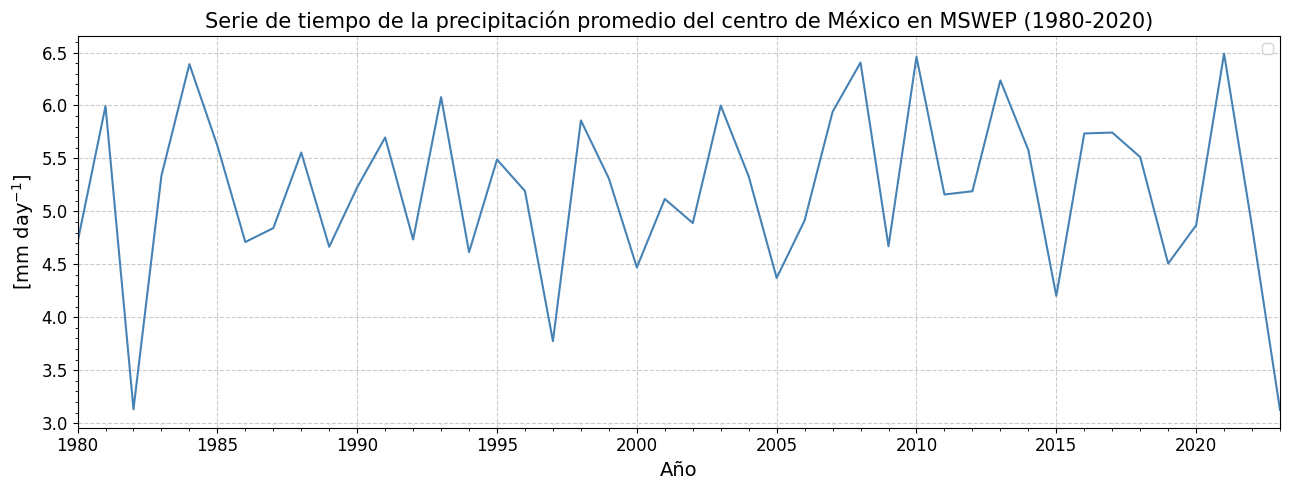

In [24]:
plt.figure(figsize=(13,5))
plt.plot(pr_annual2.time.dt.year,pr_annual2,c='steelblue') 
lineplot_setup(1980,2023,'Año','[mm day$^{-1}$]',title='Serie de tiempo de la precipitación promedio del centro de México en MSWEP (1980-2020)')
plt.legend()
plt.tight_layout()

### **<font color="Steelblue"> El segundo con coeficientes de regresión pero seleccionando el centro-sur de México.</font>** 

In [25]:
jjas2 = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)

In [26]:
# Seleccionamos el área centro-sur
area = jjas2.sel(lat=slice(13.75, 23.75))
arealon = area.sel(lon=slice(253.75, 273.5))

#area = jjas2.sel(lat=slice(22.5,13.5))
#arealon = area.sel(lon=slice(254.5,273.5))

# Guardamos los datos en netcdf
#arealon.to_netcdf('MSWEP_JJAS.nc')

In [27]:
jjas2.lat

<xarray.DataArray 'lat' (lat: 180)> Size: 1kB
array([-44.75, -44.25, -43.75, -43.25, -42.75, -42.25, -41.75, -41.25, -40.75,
       -40.25, -39.75, -39.25, -38.75, -38.25, -37.75, -37.25, -36.75, -36.25,
       -35.75, -35.25, -34.75, -34.25, -33.75, -33.25, -32.75, -32.25, -31.75,
       -31.25, -30.75, -30.25, -29.75, -29.25, -28.75, -28.25, -27.75, -27.25,
       -26.75, -26.25, -25.75, -25.25, -24.75, -24.25, -23.75, -23.25, -22.75,
       -22.25, -21.75, -21.25, -20.75, -20.25, -19.75, -19.25, -18.75, -18.25,
       -17.75, -17.25, -16.75, -16.25, -15.75, -15.25, -14.75, -14.25, -13.75,
       -13.25, -12.75, -12.25, -11.75, -11.25, -10.75, -10.25,  -9.75,  -9.25,
        -8.75,  -8.25,  -7.75,  -7.25,  -6.75,  -6.25,  -5.75,  -5.25,  -4.75,
        -4.25,  -3.75,  -3.25,  -2.75,  -2.25,  -1.75,  -1.25,  -0.75,  -0.25,
         0.25,   0.75,   1.25,   1.75,   2.25,   2.75,   3.25,   3.75,   4.25,
         4.75,   5.25,   5.75,   6.25,   6.75,   7.25,   7.75,   8.25,   8.75,
         9.25,   9.75,  10.25,  10.75,  11.25,  11.75,  12.25,  12.75,  13.25,
        13.75,  14.25,  14.75,  15.25,  15.75,  16.25,  16.75,  17.25,  17.75,
        18.25,  18.75,  19.25,  19.75,  20.25,  20.75,  21.25,  21.75,  22.25,
        22.75,  23.25,  23.75,  24.25,  24.75,  25.25,  25.75,  26.25,  26.75,
        27.25,  27.75,  28.25,  28.75,  29.25,  29.75,  30.25,  30.75,  31.25,
        31.75,  32.25,  32.75,  33.25,  33.75,  34.25,  34.75,  35.25,  35.75,
        36.25,  36.75,  37.25,  37.75,  38.25,  38.75,  39.25,  39.75,  40.25,
        40.75,  41.25,  41.75,  42.25,  42.75,  43.25,  43.75,  44.25,  44.75])
Coordinates:
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
    units    <U8 32B 'mm day-1'
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_N
    axis:           Y
    bounds:         lat_bnds

In [28]:
# Seleccionamos Mexico 
#area = jjas2.sel(lat=slice(10.25, 33.25))
#arealon = area.sel(lon=slice(241, 276))
# Guardar los datos en netcdf
#arealon.to_netcdf('MSWEP_JJAS_actualizado.nc')

In [29]:
mean_precipitation_obs = arealon.groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).values

In [30]:
years = np.arange(1980, 2024)

In [31]:
mean_precipitation_obs

array([6.704151 , 8.004066 , 5.2073946, 6.8720717, 8.514897 , 5.975315 ,
       5.070848 , 6.371338 , 8.1591015, 6.8498087, 6.2972326, 5.916814 ,
       6.123365 , 7.7610517, 4.892614 , 7.5717998, 6.6003776, 5.4421597,
       7.146392 , 7.904214 , 6.402781 , 5.7691674, 6.3618555, 6.395925 ,
       5.572566 , 6.761245 , 6.126119 , 6.202721 , 7.6578426, 5.3252497,
       8.679527 , 7.2718987, 6.1724997, 7.591807 , 6.401348 , 4.8920527,
       5.8932424, 6.7173285, 5.106411 , 4.733793 , 6.002791 , 6.6637683,
       6.400398 , 4.4412956], dtype=float32)

In [32]:
X2=years
y2=mean_precipitation_obs
#np.save('serie_pr_MSWEP.npy',y2)

In [33]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [34]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Hacemos la prueba con Ordinary Least Squares - obtenido de: https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html 
X = sm.add_constant(X2)  
modelo = sm.OLS(y2, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.952
Date:                Sun, 16 Nov 2025   Prob (F-statistic):             0.0932
Time:                        03:06:34   Log-Likelihood:                -62.023
No. Observations:                  44   AIC:                             128.0
Df Residuals:                      42   BIC:                             131.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.8267     24.096      1.985      0.0

In [36]:
# Hacemos la prueba de Bresuch-Pagan, obtenida de: https://www.statology.org/breusch-pagan-test-python/
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', np.float64(0.12191870480589229)),
 ('p-value', np.float64(0.7269627449175258)),
 ('f-value', np.float64(0.11670030800568336)),
 ('f p-value', np.float64(0.7343445626328027))]

In [37]:
# Calculamos la pendiente (beta1) y la intersección en el eje y (beta0)
m2 = np.sum((X2 - np.mean(X2)) * (y2 - np.mean(y2))) / np.sum((X2 - np.mean(X2))**2)
b2 =  np.mean(y2) - m2 * np.mean(X2)
m2_siglo=m2*100
m2_siglo
#np.save('pendiente_MSWEP.npy',m2_siglo)

np.float64(-2.068273599421667)

In [38]:
print(f"Pendiente (beta 1): {m2}")
print(f"Pendiente (beta 1 * 100): {m2_siglo}")
print(f"Ordenada al origen (beta 0): {b2}")

Pendiente (beta 1): -0.02068273599421667
Pendiente (beta 1 * 100): -2.068273599421667
Ordenada al origen (beta 0): 47.826691900835314


In [39]:
# Ec. de regresión lineal simple
predicciones2= b2 + m2 * X2
res = stats.linregress(X2, y2)
#np.save('predicciones_mswep.npy', predicciones2)
print(res)

LinregressResult(slope=np.float64(-0.020682735994216675), intercept=np.float64(47.82669190083532), rvalue=np.float64(-0.2562449953090394), pvalue=np.float64(0.09315844482937538), stderr=np.float64(0.012038713359575494), intercept_stderr=np.float64(24.095969731232532))


In [40]:
# Otra forma de ver el pvalue
print(f"P-valor: {res.pvalue:.5f}")

P-valor: 0.09316


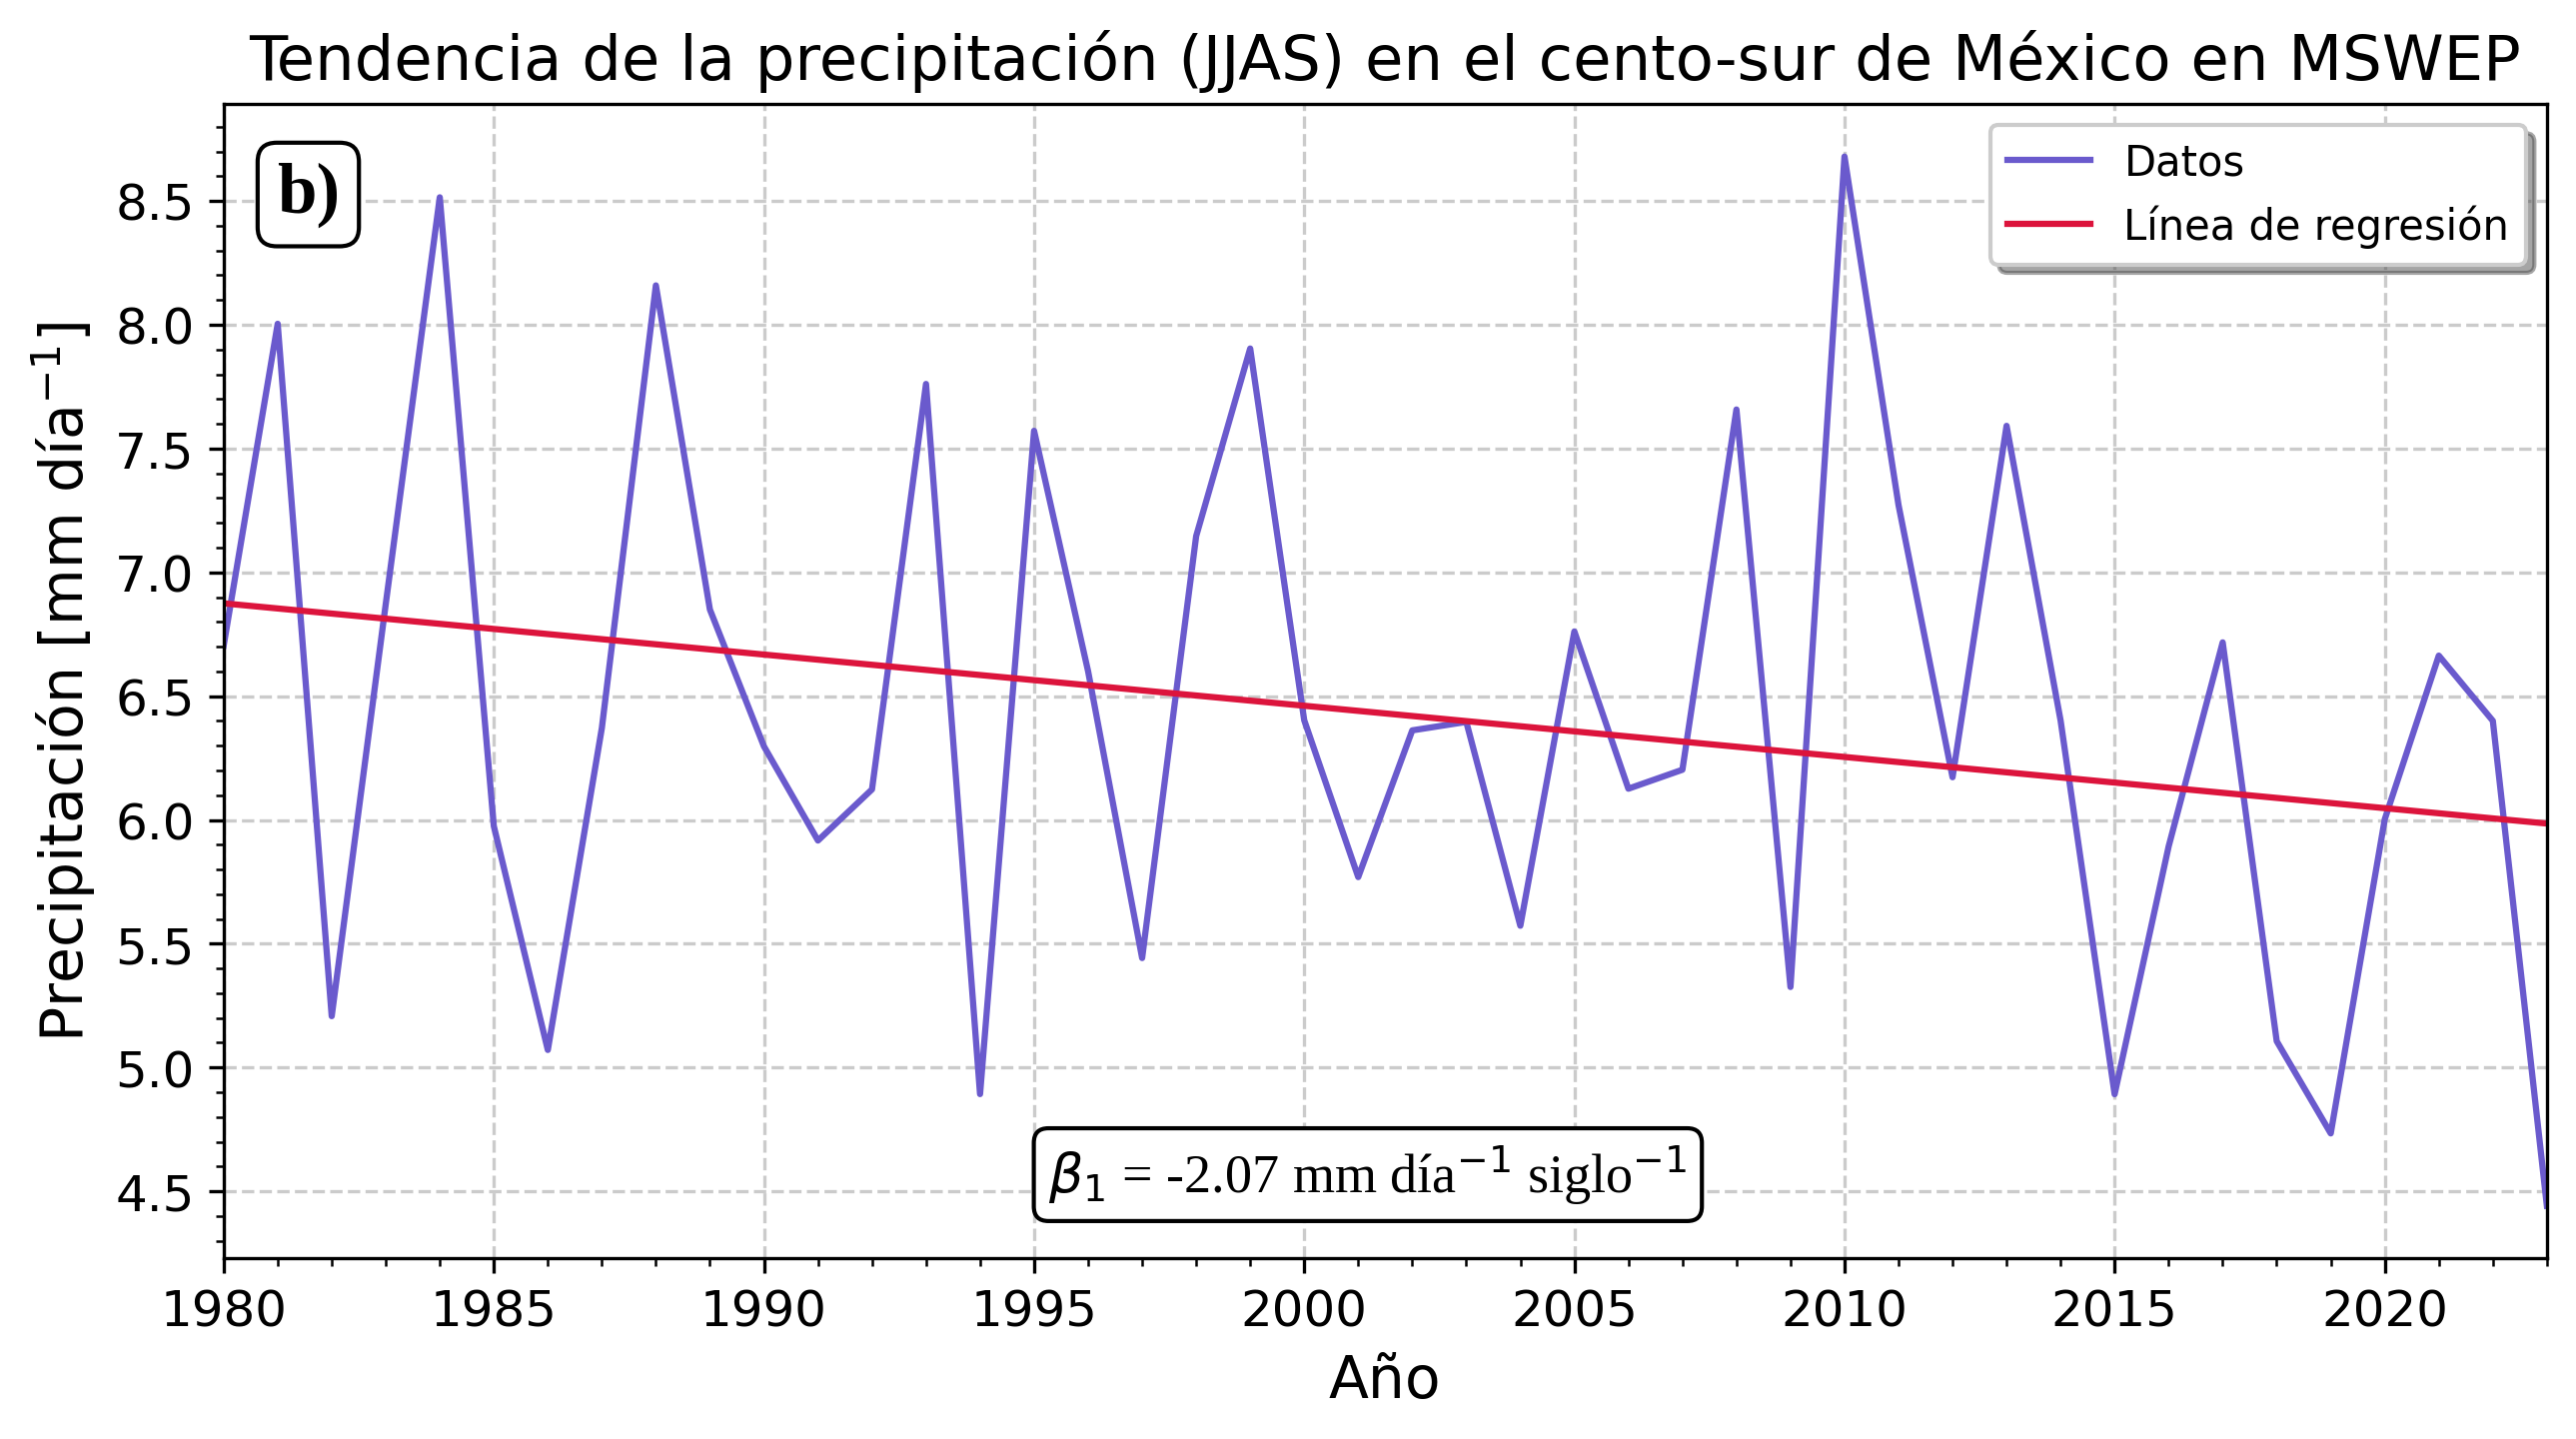

In [41]:
# Graficamos los datos y la línea de regresión
import matplotlib.ticker as ticker

plt.figure(figsize=(10,5), dpi=300)
plt.plot(X2, y2, color='slateblue', label='Datos')
plt.plot(X2, predicciones2, color='crimson', label='Línea de regresión')
plt.text(0.05, 0.95, 'b)', transform=plt.gca().transAxes, fontsize=17, fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))
lineplot_setup(1980,2023,'Año','Precipitación [mm día$^{-1}$]',title='Tendencia de la precipitación (JJAS) en el cento-sur de México en MSWEP',legend=True)
    
plt.text(0.63, 0.1, r'$\beta_1$ = -2.07 mm día$^{-1}$ siglo$^{-1}$', transform=plt.gca().transAxes, fontsize=13, fontname='Liberation Serif', fontweight='normal', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))

ax = plt.gca() 
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))  # Intervalo de 0.5 en 0.5

In [42]:
# Hacemos una funcion para los coeficientes de regresión
def reg_coef(X,y):
    m=np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
    b = np.mean(y) - m * np.mean(X)
    return m,b

# Se inicializa la matriz
coef_matriz_m = np.zeros((len(arealon.lat), len(arealon.lon)))
coef_matriz_b = np.zeros((len(arealon.lat), len(arealon.lon)))

for i, lat in enumerate(arealon.lat):
    for j, lon in enumerate(arealon.lon):
        # Calculamos los coeficientes 
        y = arealon.sel(lat=lat, lon=lon).groupby('time.year').mean(dim='time').values
        X = years
        m,b = reg_coef(X,y)
        
        # Guardamos m y b en la matriz
        coef_matriz_m[i, j] = m
        coef_matriz_b[i, j] = b

In [43]:
 print(m)

-0.007955188134591961


In [44]:
print(i, j, lon, lat) 

20 31 <xarray.DataArray 'lon' ()> Size: 8B
array(273.4375)
Coordinates:
    lon      float64 8B 273.4
    units    <U8 32B 'mm day-1'
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_E
    axis:           X
    bounds:         lon_bnds <xarray.DataArray 'lat' ()> Size: 8B
array(23.75)
Coordinates:
    lat      float64 8B 23.75
    units    <U8 32B 'mm day-1'
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_N
    axis:           Y
    bounds:         lat_bnds


In [45]:
arealon.lat
#arealon.lon

<xarray.DataArray 'lat' (lat: 21)> Size: 168B
array([13.75, 14.25, 14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75, 18.25,
       18.75, 19.25, 19.75, 20.25, 20.75, 21.25, 21.75, 22.25, 22.75, 23.25,
       23.75])
Coordinates:
  * lat      (lat) float64 168B 13.75 14.25 14.75 15.25 ... 22.75 23.25 23.75
    units    <U8 32B 'mm day-1'
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_N
    axis:           Y
    bounds:         lat_bnds

In [46]:
print(coef_matriz_m.shape)  
print(len(arealon.lat), len(arealon.lon))  

(21, 32)
21 32


In [47]:
print(np.nanmin(coef_matriz_m), np.nanmax(coef_matriz_m))

-0.13421181654577274 0.03099709094788845


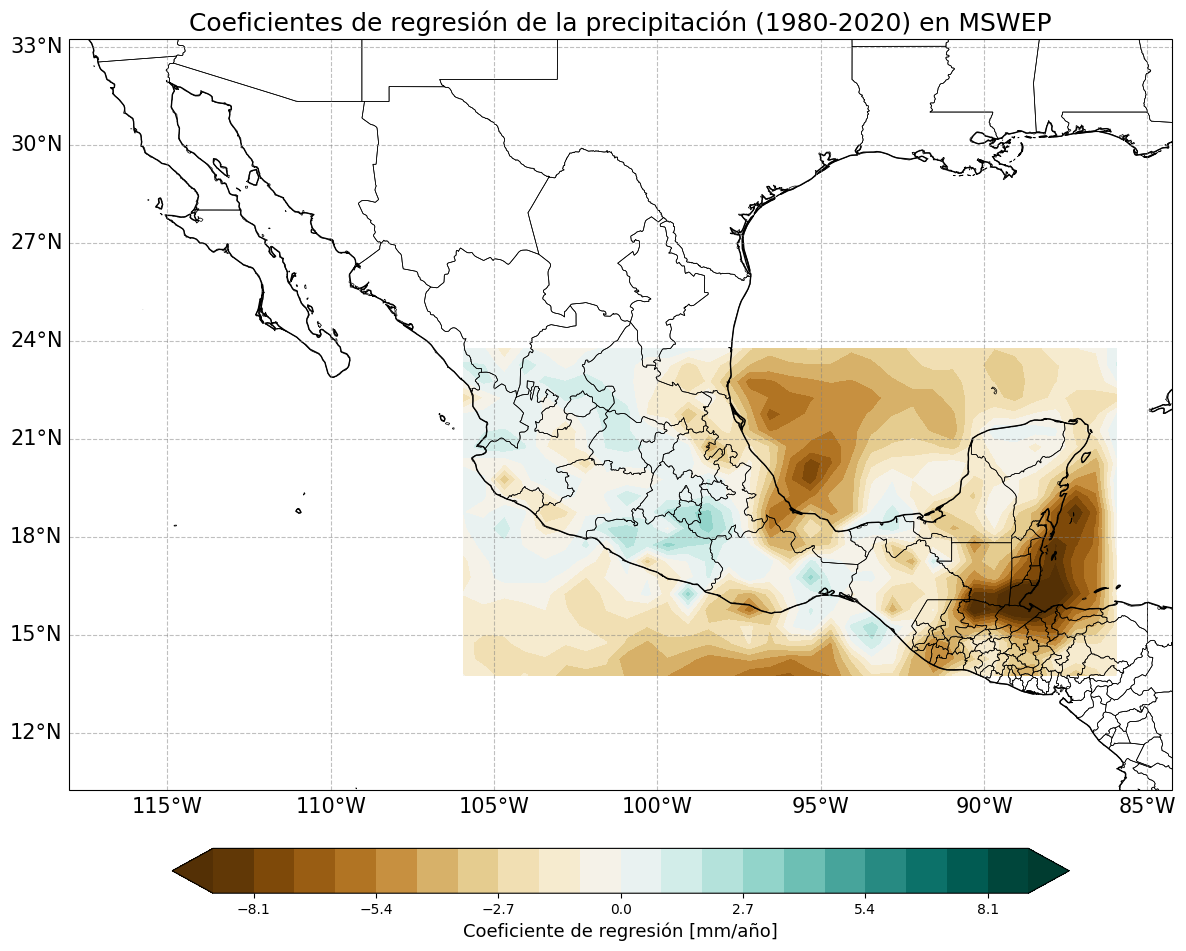

In [48]:
coef_matriz_m_da = xr.DataArray(coef_matriz_m, coords=[arealon.lat, arealon.lon], dims=["lat", "lon"])
# Guardar la matriz de coeficientes en netcdf
#coef_matriz_m_da.to_netcdf('coeficientes_regresion_MSWEP_actualizado.nc')

# Configuramos los levels 
levels = np.linspace(-9, 9, 21) 

# Graficamos
mapa_MC(coef_matriz_m_da*100, levels, 'BrBG', 'Coeficientes de regresión de la precipitación (1980-2020) en MSWEP', extend='both', cbarlabel='Coeficiente de regresión [mm/año]',
        lon_min=242, lon_max=275.75, lat_min=10.25, lat_max=33.25)

In [49]:
# Cargamos todos los archivos de la ec. de regresión lineal simple, así como la serie de tiempo
gpcp=np.load('predicciones_GPCP.npy')
gpcc=np.load('predicciones_GPCC.npy')
mswep=np.load('predicciones_mswep.npy')
spear_21=np.load('predicciones_SPEAR_ens_1921.npy')
spear_80=np.load('predicciones_SPEAR_ens_1980.npy')

gpcp_serie=np.load('serie_pr_GPCP.npy')
gpcc_serie=np.load('serie_pr_GPCC.npy')
mswep_serie=np.load('serie_pr_MSWEP.npy')
spear_21_serie=np.load('serie_pr_SPEAR_21.npy')
spear_80_serie=np.load('serie_pr_SPEAR_1980.npy')

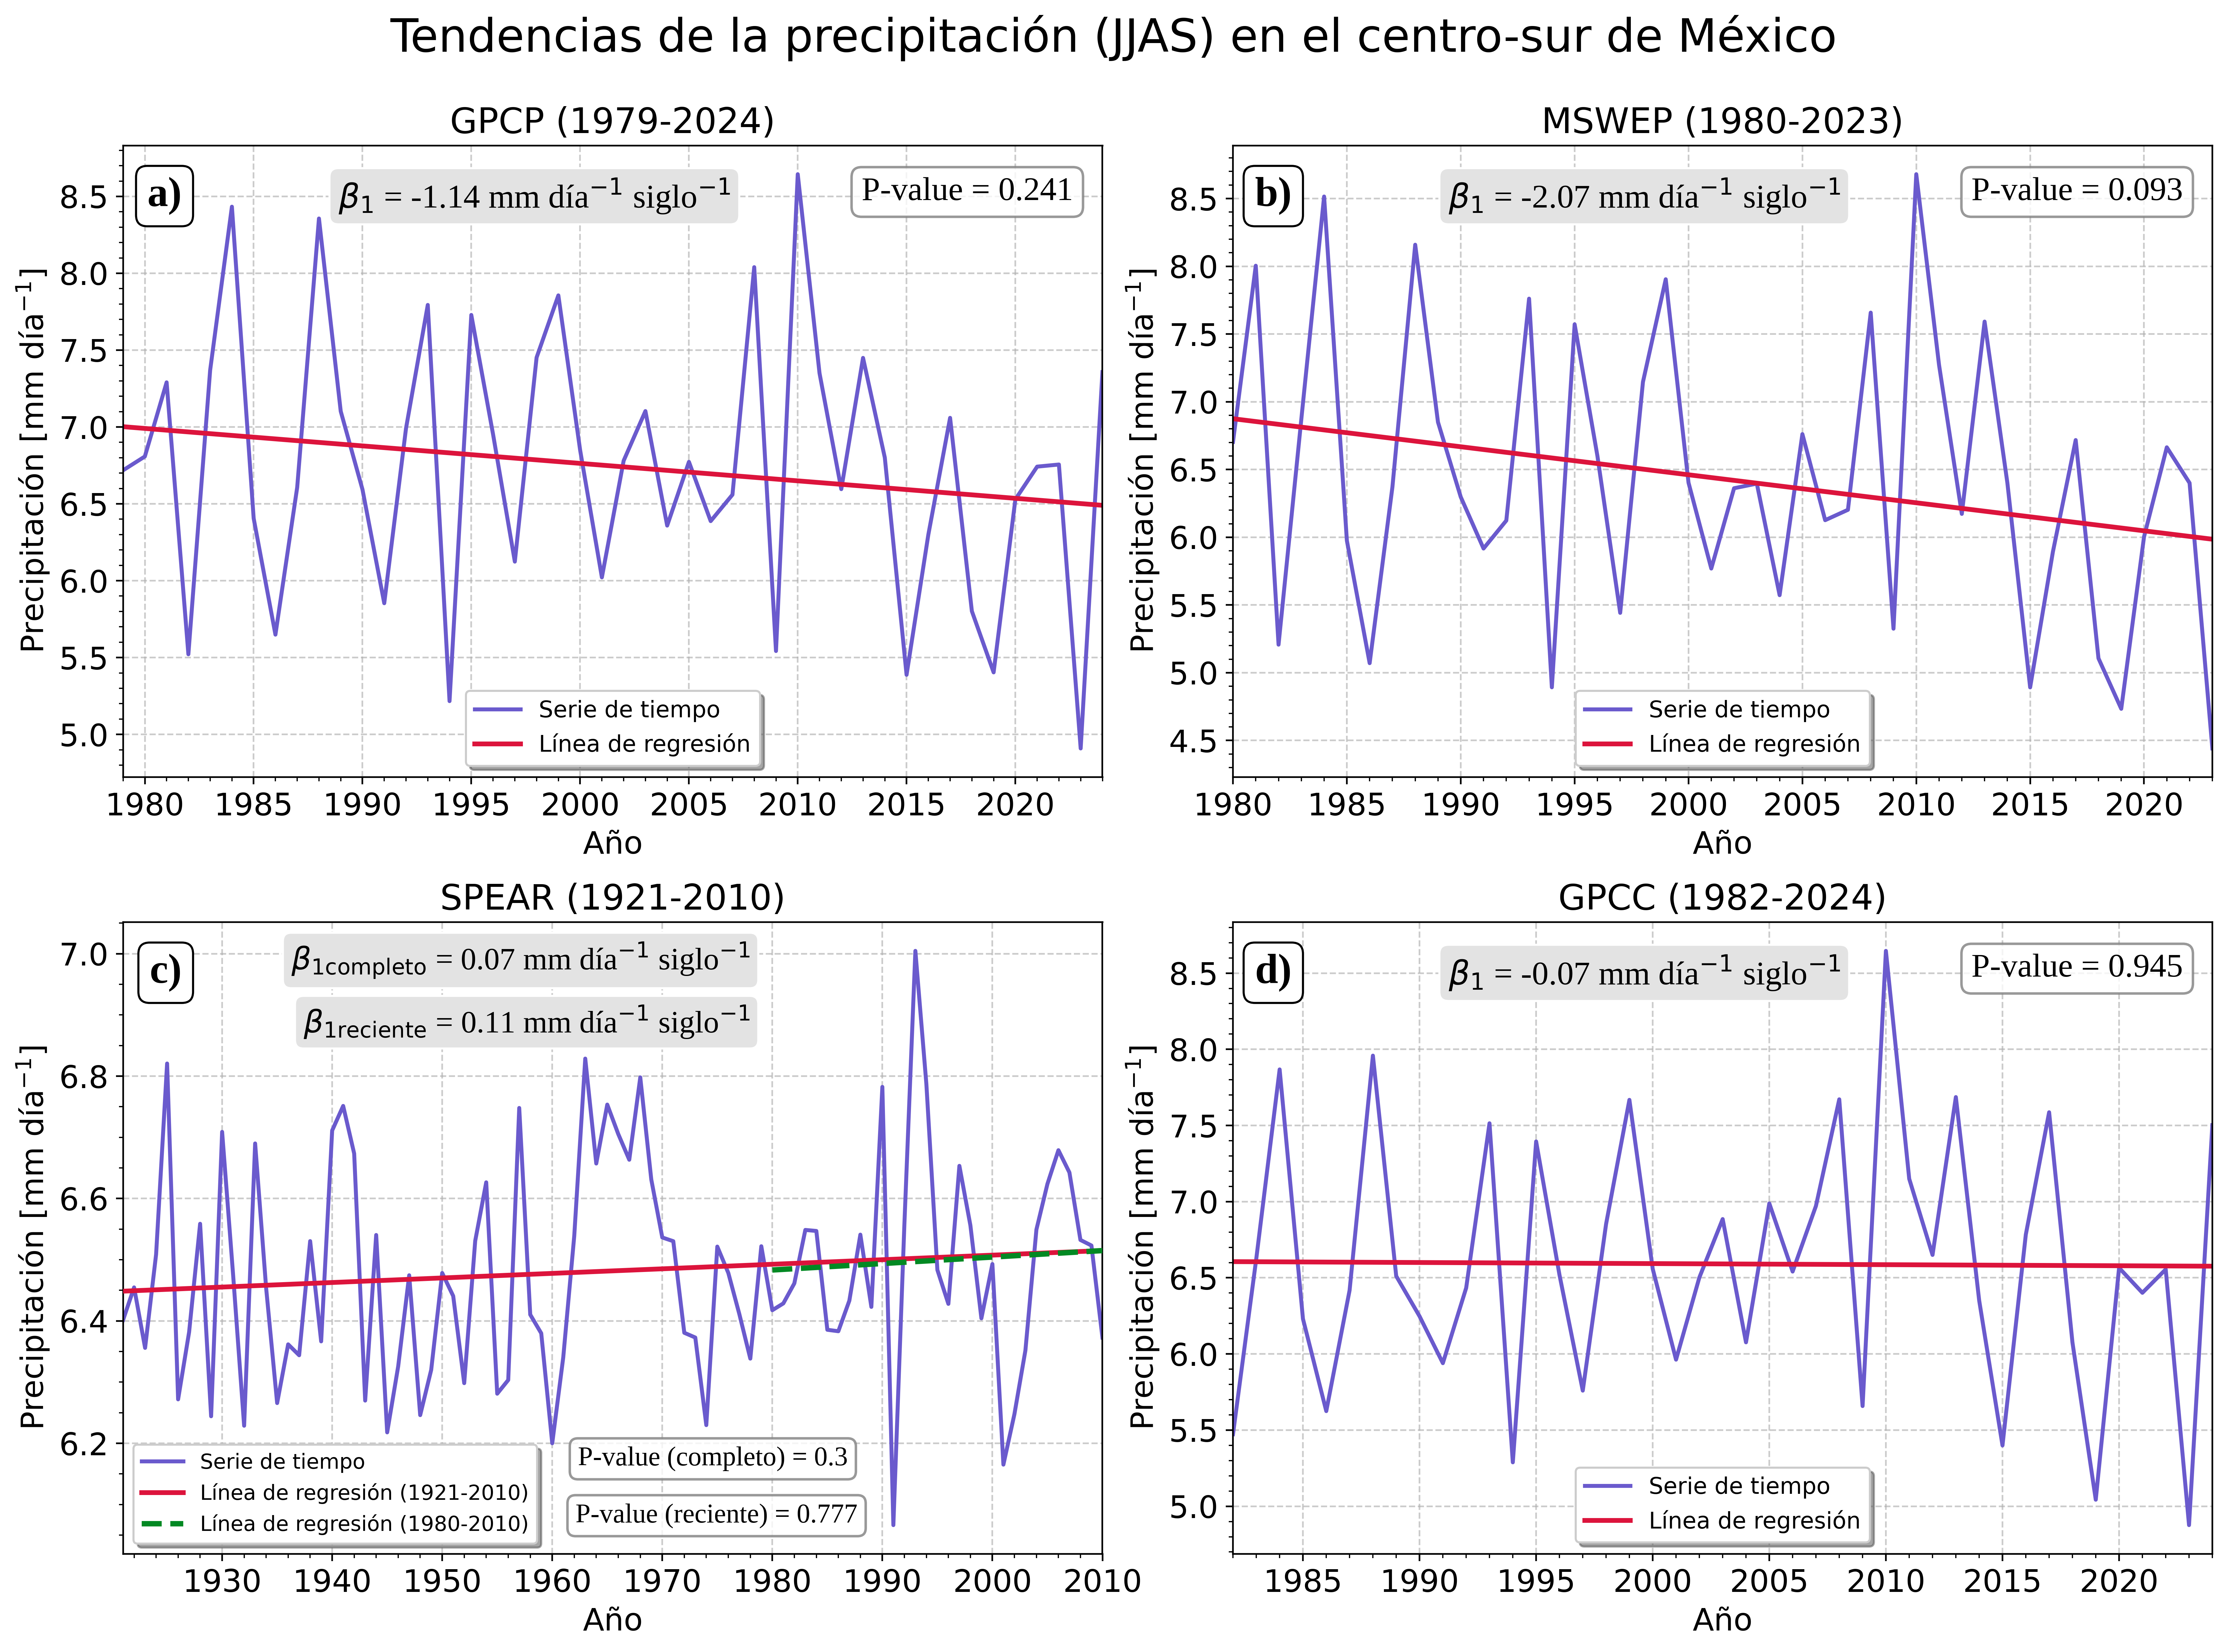

In [50]:
# Vamos a graficar aquí todas las series de tiempo con las tendencias en subplots
# Años de cada dataset
X_años = [np.arange(1979, 2025), np.arange(1980, 2024),np.arange(1921, 2011), np.arange(1982, 2025)]

# datos en listas
datos = [gpcp_serie,mswep_serie,spear_21_serie,gpcc_serie]
pendientes = [gpcp,mswep,spear_21,gpcc]
beta_1=[-1.14, -2.07, 0.07,-0.07]
titulos=["GPCP (1979-2024)","MSWEP (1980-2023)","SPEAR (1921-2010)", "GPCC (1982-2024)"]
X_spear_80=np.arange(1980, 2011)
predicciones_spear_80=spear_80
beta_1_spear_80=0.11

pvalue_texto = [0.241, 0.093, 0.30, 0.945]
pvalue_texto_spear_80=[0.777]

fig, axes = plt.subplots(2, 2, figsize=(15, 11), dpi=500)
axes = axes.flatten()

paneles = ['a)', 'b)', 'c)', 'd)']

for i, ax in enumerate(axes):
    ax.plot(X_años[i], datos[i], color='slateblue', label='Serie de tiempo', linewidth=1.9)
    if i != 2:
        ax.plot(X_años[i], pendientes[i], color='crimson', label='Línea de regresión', linewidth=2.3)
    
    if i == 2: 
        ax.plot(X_años[2], pendientes[2], color='crimson', linestyle='-', label='Línea de regresión (1921-2010)',linewidth=2.3, zorder=100)
        ax.plot(X_spear_80, predicciones_spear_80, color='#028923', linestyle='--', label='Línea de regresión (1980-2010)',linewidth=2.6, zorder=100)

    # Letras abcd
    ax.text(0.06, 0.95, paneles[i], transform=ax.transAxes,
            fontsize=20, fontname='Liberation Serif', fontweight='bold',va='top', ha='right',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))
    
    # valores beta1 (pendiente)
    if i != 2:
        ax.text(0.62, 0.95, rf'$\beta_1$ = {beta_1[i]:.2f} mm día$^{{-1}}$ siglo$^{{-1}}$',
            transform=ax.transAxes, fontsize=16,fontname='Liberation Serif', fontweight='normal',
            va='top', ha='right',
            bbox=dict(facecolor='#E3E3E3', edgecolor='white', boxstyle='round,pad=0.27', linewidth=1))
    # si es SPEAR tratamos de forma diferente porque hay dos valores    
    if i==2:
        ax.text(0.64, 0.97, r'$\beta_{\mathrm{1 completo}}$ = 0.07 mm día$^{-1}$ siglo$^{-1}$',
            transform=ax.transAxes, fontsize=15,fontname='Liberation Serif', fontweight='normal',
            va='top', ha='right',
            bbox=dict(facecolor='#E3E3E3', edgecolor='white', boxstyle='round,pad=0.27', linewidth=1))

        ax.text(0.64, 0.87, r'$\beta_{\mathrm{1 reciente}}$ = 0.11 mm día$^{-1}$ siglo$^{-1}$',
            transform=ax.transAxes, fontsize=15,fontname='Liberation Serif', fontweight='normal',
            va='top', ha='right',
            bbox=dict(facecolor='#E3E3E3', edgecolor='white', boxstyle='round,pad=0.27', linewidth=1))
        

    if i in [0, 1]:  # solo al a) y c)
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    
    #eje x (años) de cada uno
    ax.set_xlim(X_años[i][0], X_años[i][-1])
    ax.set_xlabel('Año',fontsize=15)
    ax.set_ylabel('Precipitación [mm día$^{-1}$]', fontsize=15)
    ax.set_title(titulos[i], fontsize=17)
    ax.grid(linestyle='--',alpha=0.66)
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=15)  

    if i != 2:
        ax.text(0.97, 0.95,rf'P-value = {pvalue_texto[i]}',transform=ax.transAxes,fontsize=16,fontname='Liberation Serif',fontweight='normal',
    va='top', ha='right',bbox=dict(facecolor='white', edgecolor='gray',boxstyle='round,pad=0.3',alpha=0.8,linewidth=1.2))

    if i==2:
        ax.text(0.74, 0.17,rf'P-value (completo) = {pvalue_texto[i]}',transform=ax.transAxes,fontsize=13,fontname='Liberation Serif',fontweight='normal',
    va='top', ha='right',bbox=dict(facecolor='white', edgecolor='gray',boxstyle='round,pad=0.3',alpha=0.8,linewidth=1.2))
       
        ax.text(0.75, 0.08,rf'P-value (reciente) = 0.777',transform=ax.transAxes,fontsize=13,fontname='Liberation Serif',fontweight='normal',
    va='top', ha='right',bbox=dict(facecolor='white', edgecolor='gray',boxstyle='round,pad=0.3',alpha=0.8,linewidth=1.2))


    ax.legend(fancybox=True,shadow=True,loc="lower center",fontsize=11)
    if i==2:
        ax.legend(fancybox=True,shadow=True,loc="lower left",fontsize=10)
    
    fig.subplots_adjust(hspace=0.45, wspace=0.5, bottom=0.12, top=0.92)    
    fig.suptitle('Tendencias de la precipitación (JJAS) en el centro-sur de México', fontsize=22, y=1)
    
plt.tight_layout()
plt.show()